In [172]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar

In [134]:
#read files
#clean fake news
#create new columns
#merge fake and true news

fakeNews = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Stage F Open Source Dataset\Fake.csv')
fakeNews.insert(0, 'fake/true', 'Fake')

fakeNews['date'] = pd.to_datetime(fakeNews['date'],errors='coerce')
fakeNews['year'] = pd.DatetimeIndex(fakeNews['date']).year.fillna(0).astype(int)
fakeNews['month'] = pd.DatetimeIndex(fakeNews['date']).month.fillna(0).astype(int)


trueNews = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Stage F Open Source Dataset\True.csv')
trueNews.insert(0, 'fake/true', 'True')
trueNews['date'] = pd.to_datetime(trueNews['date'], format = '%Y,%m,%d', errors='ignore')
trueNews['year'] = pd.DatetimeIndex(trueNews['date']).year
trueNews['month'] = pd.DatetimeIndex(trueNews['date']).month

news = pd.concat([fakeNews,trueNews])
news

,fake/true,title,text,subject,date,year,month
0,Fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31 00:00:00,2017,12
1,Fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31 00:00:00,2017,12
2,Fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30 00:00:00,2017,12
3,Fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29 00:00:00,2017,12
4,Fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25 00:00:00,2017,12
...,...,...,...,...,...,...,...
21412,True,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",2017,8
21413,True,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",2017,8
21414,True,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",2017,8
21415,True,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",2017,8


In [135]:
newsgroupby_1 = news.groupby(['subject','fake/true'],as_index=False)['text'].count()
newsgroupby_1

,subject,fake/true,text
0,Government News,Fake,1570
1,Middle-east,Fake,778
2,News,Fake,9050
3,US_News,Fake,783
4,left-news,Fake,4459
5,politics,Fake,6841
6,politicsNews,True,11272
7,worldnews,True,10145


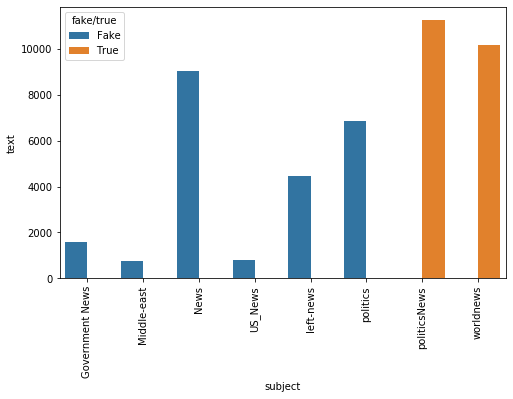

In [136]:
plt.figure(figsize=(8,5))
news_fig1 = sns.barplot(x='subject',y='text',hue= 'fake/true',data =newsgroupby_1)
plt.xticks(rotation='vertical')
news_fig1

In [ ]:
#news.describe().head(20)

### Note: 
#### True news have only 2 subjects; politicsNews and worldNews
#### Fake news have 6 different subjects; Government News, Middle-east, News, US_News, left-news and politics


In [168]:
newsgroupby_2=news.groupby(['fake/true','month'],as_index=False)['title'].count()
newsgroupby_2

,fake/true,month,title
0,Fake,0,10
1,Fake,1,2110
2,Fake,2,1934
3,Fake,3,2162
4,Fake,4,2108
5,Fake,5,2177
6,Fake,6,1921
7,Fake,7,1951
8,Fake,8,1907
9,Fake,9,1774


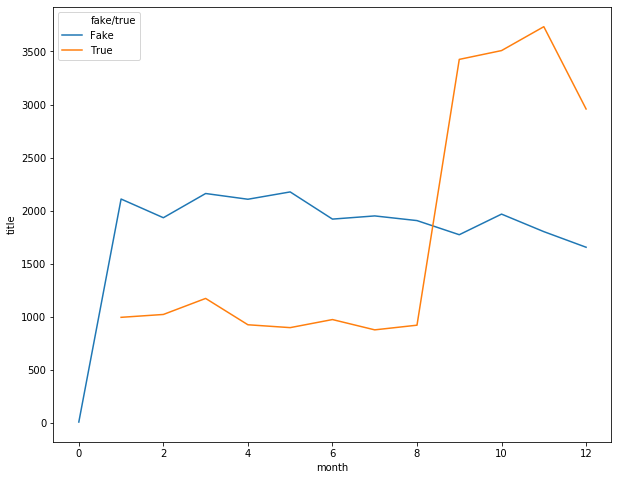

In [169]:
plt.figure(figsize=(10,8))
news_fig2 = sns.lineplot(x='month',y='title',hue= 'fake/true',data =newsgroupby_2)
news_fig2

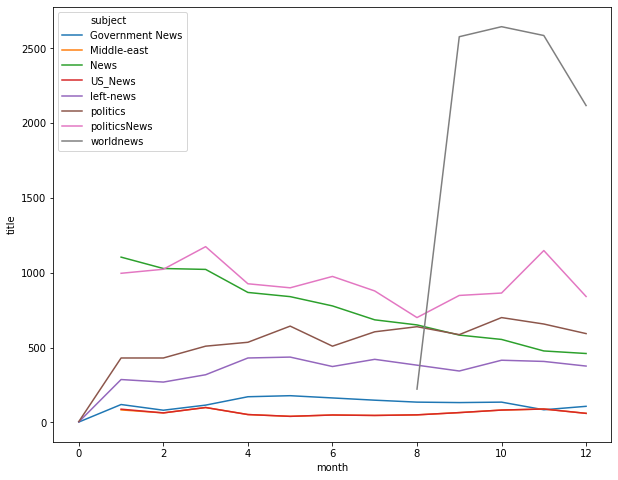

In [152]:
newsgroupby_3=news.groupby(['subject','month'],as_index=False)['title'].count()

plt.figure(figsize=(10,8))
news_fig3 = sns.lineplot(x='month',y='title',hue= 'subject',data =newsgroupby_3)
news_fig3

### Note:
#### Dates for fake news was steady from the 1st month up till the 12th month. The total number of news for each month ranged between 1,600 and a little over 2,000
#### For true news, the count for each month up till the 8th month was a little below or above 1,000. By the 9th month, total number of news per month progressed to somewhere between 3,000 and 3,500 and progressed till November until the number dropped again in December. The news subject that caused true news to shoot up is 'world news'

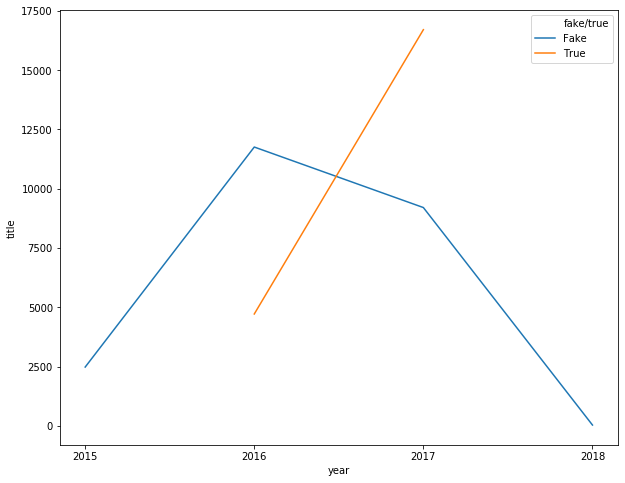

In [165]:
newsgroupby_4 = news.groupby(['fake/true','year'],as_index=False)['title'].count().drop(0)
#newsgroupby_4['year'] = pd.to_datetime(newsgroupby_4['year'])
newsgroupby_4['year'] =newsgroupby_4['year'].astype(str)
newsgroupby_4

plt.figure(figsize=(10,8))
news_fig4 = sns.lineplot(x='year',y='title',hue= 'fake/true',data =newsgroupby_4)
news_fig4

### Note: 
#### Years for fake news range from 2015 to 2018
#### true news were published between 2016 and 2017 
#### Altogether the highest number of news was in 2017

## VIEWING MOST COMMON WORDS

In [174]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [175]:
from wordcloud import WordCloud, STOPWORDS

In [177]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [179]:
from PIL import Image

In [182]:
#?WordCloud

There are 2235344 words in the combination of all words.
FAKE NEWS BY TITLE


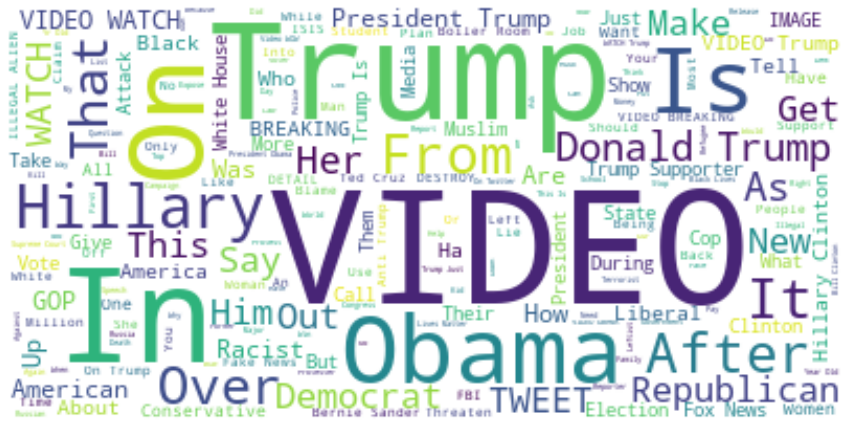

In [229]:
text = " ".join(word for word in fakeNews.title)
print ("There are {} words in the combination of all words.".format(len(text)))
print ("FAKE NEWS BY TITLE")

stopwords = (["a", "the", "for", "us", "of","his","to","by","at","not","be","will","and","with"])

wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

FAKE NEWS BY TEXT


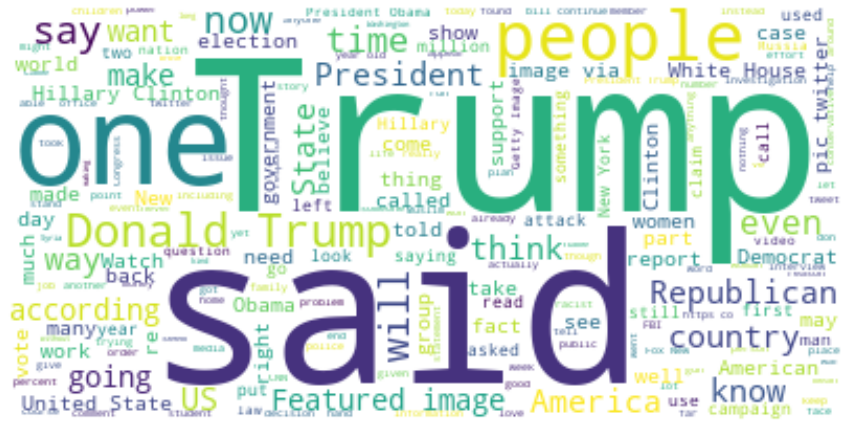

In [223]:
text = " ".join(word for word in fakeNews.text)
print ("FAKE NEWS BY TEXT")

stopwords = (["a", "the", "for", "us", "of","his","to","by","at","not","be","will","and","with"])

wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

There are 1406408 words in the combination of all words.
TRUE NEWS BY TITLE


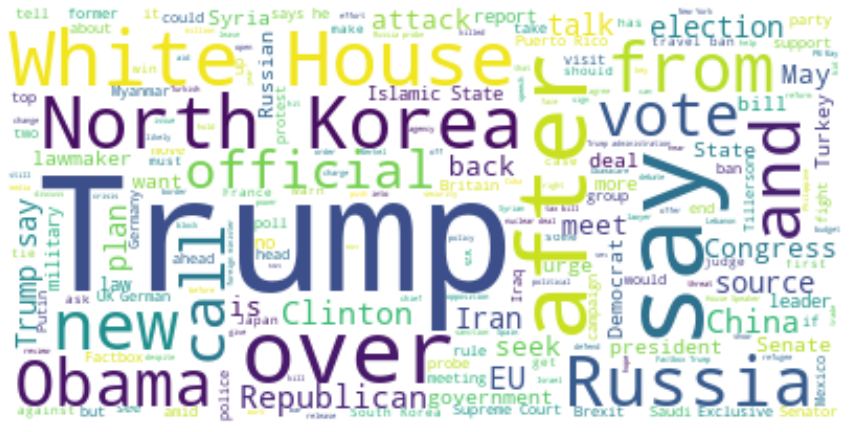

In [228]:
text = " ".join(word for word in trueNews.title)
print ("There are {} words in the combination of all words.".format(len(text)))
print ("TRUE NEWS BY TITLE")

stopwords = (["a", "the", "for", "us", "of","his","to","by","at","not","be","will","in","as","on","with"])


wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

TRUE NEWS BY TEXT


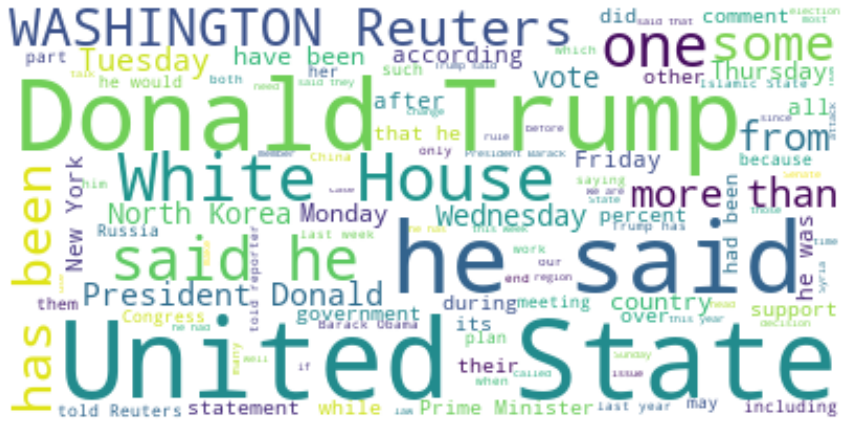

In [231]:
text = " ".join(word for word in trueNews.text)
print ("TRUE NEWS BY TEXT")

stopwords = (["a", "the", "for", "us", "of","his","to","by","at","not","be","will","in","as","on","with","and","or","but","it"])


wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

ALL NEWS BY TITLE


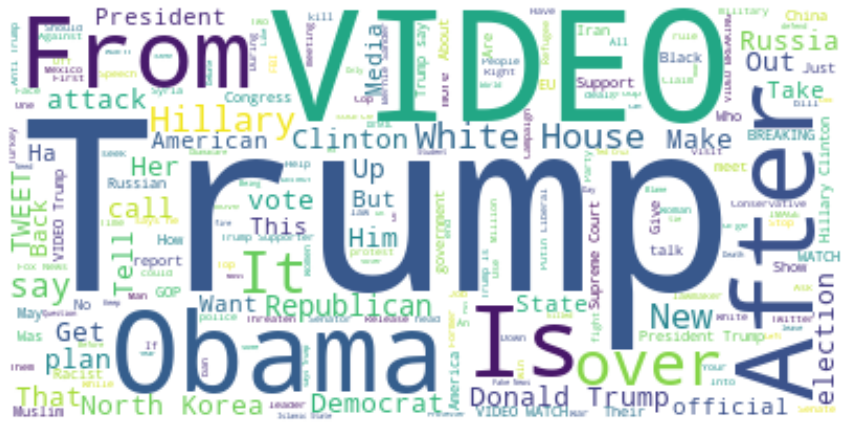

In [232]:
text = " ".join(word for word in news.title)
print ("ALL NEWS BY TITLE")

stopwords = (["a", "the", "for", "us", "of","his","to","by","at","not","be","will","in","as","on","with","and"])


wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()